In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Scenario 1

In [34]:
def equations_1(y,t, m, k, w):
    x,v = y
    dxdt = v
    dvdt = -(k*x + w*v) / m
    return [dxdt, dvdt]

In [35]:
m = 1.0     # Mass (kg)
k = 10.0    # Spring constant (N/m)
w = 0.5     # Damping constant (Ns/m)
v0 = 5.0    # Initial velocity (m/s)

x0 = 0.0    # Initial displacement (m)
y0 = [x0, v0]   # Initial condition vector

t = np.linspace(0, 25, 1000) # Time vector


In [36]:
y = odeint(equations_1, y0, t, args=(m, k, w))

x= y[:,0]
v= y[:,1]

a = -(k*x + w*v) / m

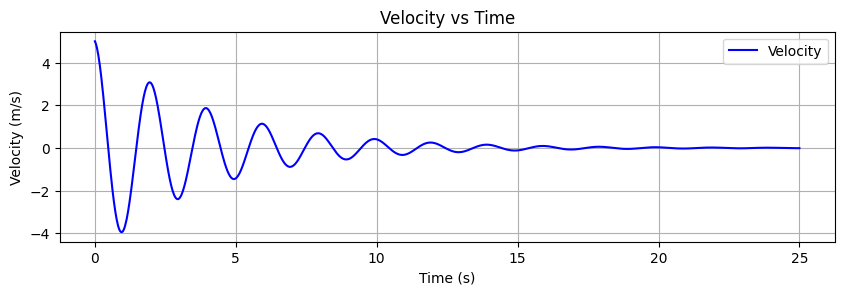

In [37]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, v, 'b-', label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

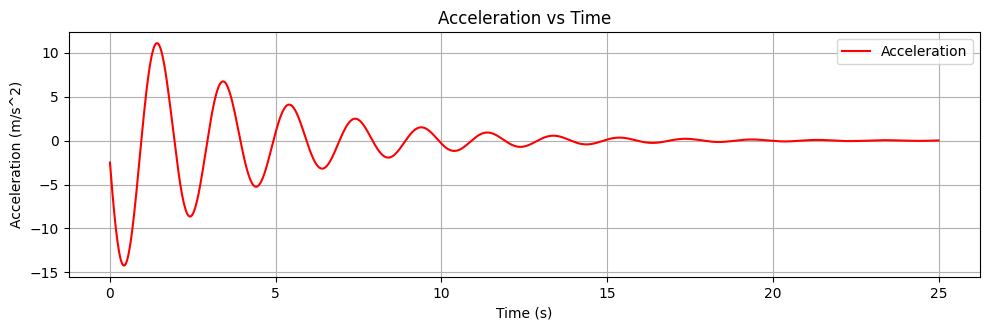

In [38]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, a, 'r-', label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Scenario 2

In [6]:
def model(y, t, mu, ms, ku, ks, cu, cs, g):
    xu, vu, xs, vs = y
    dxudt = vu
    dvudt = (-(ku*xu + ks*(xu - xs) + cu*vu) / mu) + g
    dxsdt = vs
    dvsdt = (-(ks*(xs - xu) + cs*vs) / ms) + g
    return [dxudt, dvudt, dxsdt, dvsdt]

In [62]:
mu = 50.0                        # Unsprung Mass (kg)
ms = 1500.0                      # Sprung Mass (kg)
ku = 200000.0                    # Spring constant for Unsprung Mass (N/m)
ks = [30000.0, 50000.0, 70000.0, 90000.0, 110000.0]                    # Spring constant for Sprung Mass (N/m)
g = 9.81                         # Acceleration due to gravity (m/s^2)
cu = 850                         # Damping constant for Unsprung Mass (Ns/m)
cs = [10000, 40000, 70000, 100000, 130000, 160000]                      # Damping constant for Sprung Mass (Ns/m)
v0_u = 5.0                       # Initial velocity for tyre (m/s)

xu_0 = 0.0                       # Initial displacement of unsprung mass (m)
vu_0 = v0_u                      # Initial velocity of unsprung mass (m/s)
xs_0 = 0.0                       # Initial displacement of sprung mass (m)
vs_0 = 0                         # Initial velocity of sprung mass (m/s)
y0 = [xu_0, vu_0, xs_0, vs_0]    # Initial condition vector

t = np.linspace(0, 2, 10000)    # Time vector

In [63]:
# When cs is kept constant
y1 = odeint(model, y0, t, args=(mu, ms, ku, ks[0], cu, cs[2], g))
xu_1 = y1[:,0]
vu_1 = y1[:,1]
xs_1 = y1[:,2]
vs_1 = y1[:,3]

a_u1 = (-(ku*xu_1 + ks[0]*(xu_1 - xs_1) + cu*vu_1) / mu) + g
a_s1 = (-(ks[0]*(xs_1 - xu_1) + cs[2]*vs_1) / ms) + g

y2 = odeint(model, y0, t, args=(mu, ms, ku, ks[1], cu, cs[2], g))
xu_2 = y2[:,0]
vu_2 = y2[:,1]
xs_2 = y2[:,2]
vs_2 = y2[:,3]

a_u2 = (-(ku*xu_2 + ks[1]*(xu_2 - xs_2) + cu*vu_2) / mu) + g
a_s2 = (-(ks[1]*(xs_2 - xu_2) + cs[2]*vs_2) / ms) + g

y3 = odeint(model, y0, t, args=(mu, ms, ku, ks[2], cu, cs[2], g))
xu_3 = y3[:,0]
vu_3 = y3[:,1]
xs_3 = y3[:,2]
vs_3 = y3[:,3]

a_u3 = (-(ku*xu_3 + ks[2]*(xu_3 - xs_3) + cu*vu_3) / mu) + g
a_s3 = (-(ks[2]*(xs_3 - xu_3) + cs[2]*vs_3) / ms) + g

y4 = odeint(model, y0, t, args=(mu, ms, ku, ks[3], cu, cs[2], g))
xu_4 = y4[:,0]
vu_4 = y4[:,1]
xs_4 = y4[:,2]
vs_4 = y4[:,3]

a_u4 = (-(ku*xu_4 + ks[3]*(xu_4 - xs_4) + cu*vu_4) / mu) + g
a_s4 = (-(ks[3]*(xs_4 - xu_4) + cs[2]*vs_4) / ms) + g

y5 = odeint(model, y0, t, args=(mu, ms, ku, ks[4], cu, cs[2], g))
xu_5 = y5[:,0]
vu_5 = y5[:,1]
xs_5 = y5[:,2]
vs_5 = y5[:,3]

a_u5 = (-(ku*xu_5 + ks[4]*(xu_5 - xs_5) + cu*vu_5) / mu) + g
a_s5 = (-(ks[4]*(xs_5 - xu_5) + cs[2]*vs_5) / ms) + g

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/3779949979.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, vs_1, 'r-', label='k = 30000', color = 'green')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/3779949979.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, vs_2, 'r-', label='k = 50000', color = 'blue')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/3779949979.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, vs_3, 'r-', label='k = 70000', color = 'y')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/3779949979.py:7: UserWarning: color is re

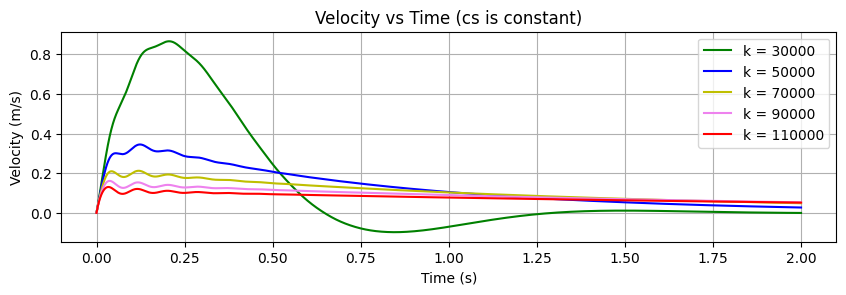

In [69]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
plt.plot(t, vs_1, 'r-', label='k = 30000', color = 'green')
plt.plot(t, vs_2, 'r-', label='k = 50000', color = 'blue')
plt.plot(t, vs_3, 'r-', label='k = 70000', color = 'y')
plt.plot(t, vs_4, 'r-', label='k = 90000', color = 'violet')
plt.plot(t, vs_5, 'r-', label='k = 110000', color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (cs is constant)')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/356935979.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, a_s1, 'r-', label='k = 30000', color = 'green')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/356935979.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, a_s2, 'r-', label='k = 50000', color = 'blue')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/356935979.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, a_s3, 'r-', label='k = 70000', color = 'y')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/356935979.py:6: UserWarning: color is redund

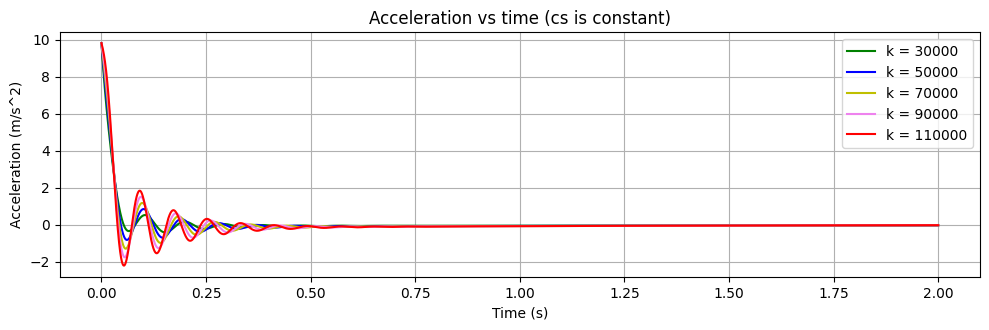

In [65]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(t, a_s1, 'r-', label='k = 30000', color = 'green')
plt.plot(t, a_s2, 'r-', label='k = 50000', color = 'blue')
plt.plot(t, a_s3, 'r-', label='k = 70000', color = 'y')
plt.plot(t, a_s4, 'r-', label='k = 90000', color = 'violet')
plt.plot(t, a_s5, 'r-', label='k = 110000', color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs time (cs is constant)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
# When ks is kept constant
y1 = odeint(model, y0, t, args=(mu, ms, ku, ks[2], cu, cs[0], g))
xu_1 = y1[:,0]
vu_1 = y1[:,1]
xs_1 = y1[:,2]
vs_1 = y1[:,3]

a_u1 = (-(ku*xu_1 + ks[2]*(xu_1 - xs_1) + cu*vu_1) / mu) + g
a_s1 = (-(ks[2]*(xs_1 - xu_1) + cs[0]*vs_1) / ms) + g

y2 = odeint(model, y0, t, args=(mu, ms, ku, ks[2], cu, cs[1], g))
xu_2 = y2[:,0]
vu_2 = y2[:,1]
xs_2 = y2[:,2]
vs_2 = y2[:,3]

a_u2 = (-(ku*xu_2 + ks[2]*(xu_2 - xs_2) + cu*vu_2) / mu) + g
a_s2 = (-(ks[2]*(xs_2 - xu_2) + cs[1]*vs_2) / ms) + g

y3 = odeint(model, y0, t, args=(mu, ms, ku, ks[2], cu, cs[2], g))
xu_3 = y3[:,0]
vu_3 = y3[:,1]
xs_3 = y3[:,2]
vs_3 = y3[:,3]

a_u3 = (-(ku*xu_3 + ks[2]*(xu_3 - xs_3) + cu*vu_3) / mu) + g
a_s3 = (-(ks[2]*(xs_3 - xu_3) + cs[2]*vs_3) / ms) + g

y4 = odeint(model, y0, t, args=(mu, ms, ku, ks[2], cu, cs[3], g))
xu_4 = y4[:,0]
vu_4 = y4[:,1]
xs_4 = y4[:,2]
vs_4 = y4[:,3]

a_u4 = (-(ku*xu_4 + ks[2]*(xu_4 - xs_4) + cu*vu_4) / mu) + g
a_s4 = (-(ks[2]*(xs_4 - xu_4) + cs[3]*vs_4) / ms) + g

y5 = odeint(model, y0, t, args=(mu, ms, ku, ks[2], cu, cs[4], g))
xu_5 = y5[:,0]
vu_5 = y5[:,1]
xs_5 = y5[:,2]
vs_5 = y5[:,3]

a_u5 = (-(ku*xu_5 + ks[2]*(xu_5 - xs_5) + cu*vu_5) / mu) + g
a_s5 = (-(ks[2]*(xs_5 - xu_5) + cs[4]*vs_5) / ms) + g

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/625134504.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, vs_1, 'r-', label='c = 10000', color = 'green')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/625134504.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, vs_2, 'r-', label='c = 40000', color = 'blue')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/625134504.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, vs_3, 'r-', label='c = 70000', color = 'y')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/625134504.py:7: UserWarning: color is redund

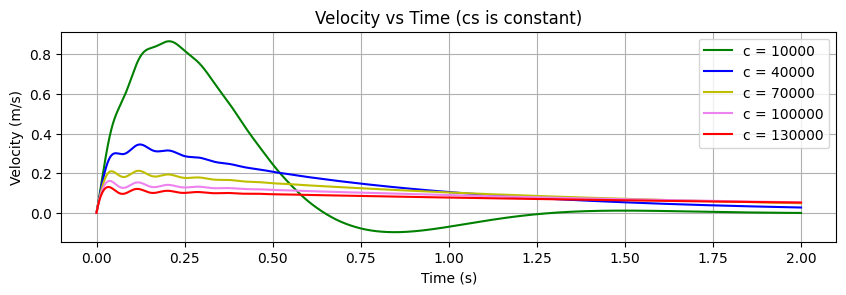

In [70]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
plt.plot(t, vs_1, 'r-', label='c = 10000', color = 'green')
plt.plot(t, vs_2, 'r-', label='c = 40000', color = 'blue')
plt.plot(t, vs_3, 'r-', label='c = 70000', color = 'y')
plt.plot(t, vs_4, 'r-', label='c = 100000', color = 'violet')
plt.plot(t, vs_5, 'r-', label='c = 130000', color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (cs is constant)')
plt.grid(True)
plt.legend()
plt.show()

/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/984560752.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, a_s1, 'r-', label='c = 10000', color = 'green')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/984560752.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, a_s2, 'r-', label='c = 40000', color = 'blue')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/984560752.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, a_s3, 'r-', label='c = 70000', color = 'y')
/var/folders/q1/r9lsqt2n4dz2fbpxq3wwh7m80000gn/T/ipykernel_3703/984560752.py:6: UserWarning: color is redund

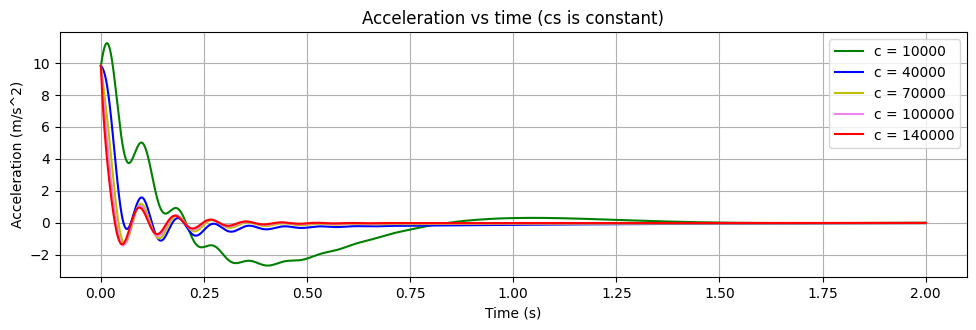

In [68]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(t, a_s1, 'r-', label='c = 10000', color = 'green')
plt.plot(t, a_s2, 'r-', label='c = 40000', color = 'blue')
plt.plot(t, a_s3, 'r-', label='c = 70000', color = 'y')
plt.plot(t, a_s4, 'r-', label='c = 100000', color = 'violet')
plt.plot(t, a_s5, 'r-', label='c = 140000', color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs time (cs is constant)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Scenario 3:
when k is a function of x or t

In [66]:
def equations_2(y,t, m, k0, w):
    x,v = y
    dxdt = v
    k = k0 * np.sin(x)
    dvdt = -(k*x + w*v) / m
    return [dxdt, dvdt]

In [67]:
m = 1.0     # Mass (kg)
k0 = 10.0    # Spring constant (N/m)
w = 0.5     # Damping constant (Ns/m)
v0 = 5.0    # Initial velocity (m/s)

x0 = 0.0    # Initial displacement (m)
y0 = [x0, v0]   # Initial condition vector

t = np.linspace(0, 25, 1000) # Time vector

In [68]:
y = odeint(equations_2, y0, t, args=(m, k0, w))

x= y[:,0]
v= y[:,1]
k = k0 * np.sin(x)

a = -(k*x + w*v) / m

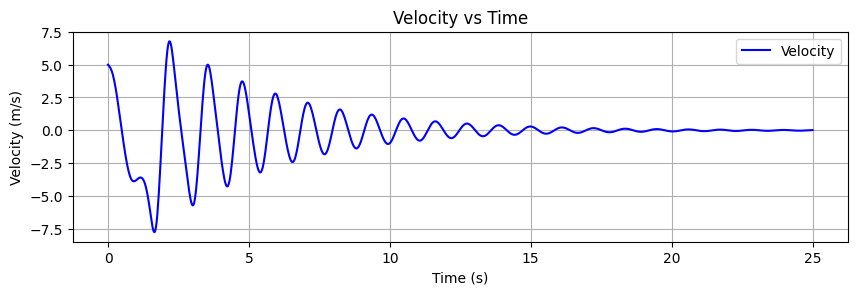

In [69]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, v, 'b-', label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

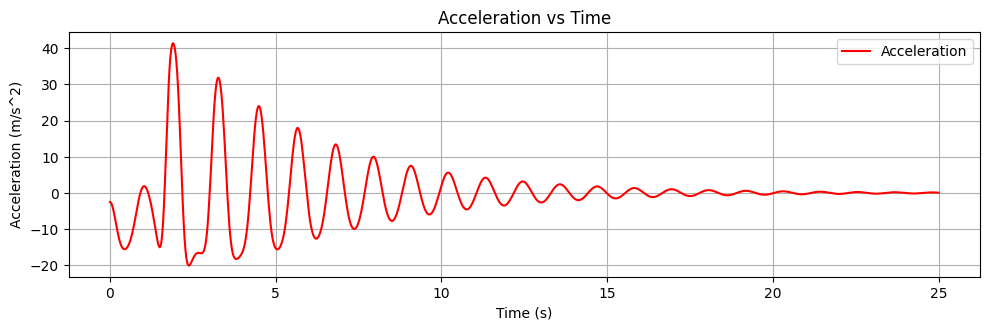

In [70]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, a, 'r-', label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
print(42+True)

43
